In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y_0 = np.array([1.]) # Initial condition

In [74]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.000089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
R = 0.000028 #best: 0.000028
m_0 = 0.001 
delta_m= 0.001
x_c = 0.0150

N = 10000
t = np.linspace(0., 20., N+1) # [s] an array of time steps

In [106]:
solve_args  = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = damping_parameter +R
#not applying chain rule above
solve_args['R'] = R
solve_args['m_0']  = m_0
print(solve_args['R'])
initial_pos    = 0. # [m]
initial_vel = 0.00215   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

2.8e-05


In [107]:
def RungeKutta4_Drop(func, y_0, x, x_c, delta_m, args):
    #print(args)
    
    # Initialise the approximation array
    y = np.zeros([len(x), len(y_0)])
    #print(y.shape)
    drop_times = np.zeros([])  
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, x_i in enumerate(x[:-1]):
        change = 0
        h   = x[i+1] - x_i # size of the step
        #print('x_i is:{}' .format(x_i)) 
        #print('x[i+1] is: {}' .format(x[i+1])) 

        k_1 = h*func(x_i        , y[i]          ,x_c, change, args)
        k_2 = h*func(x_i + h/2. , y[i] + k_1/2. ,x_c, change, args)
        k_3 = h*func(x_i + h/2. , y[i] + k_2/2. ,x_c, change, args)
        k_4 = h*func(x_i + h    , y[i] + k_3    ,x_c, change, args)

        y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
        #print(args)
        if y[i+1][0] < x_c: 
            #print('no change')
            #print(args)
            continue 
        elif y[i+1][0] >= x_c: 
            #print('THIS IS DROP TIMES ') 
            #print('x_i is:{}' .format(x_i)) 
            #print('x[i+1] is: {}' .format(x[i+1]))
            drop_times = np.append(drop_times, x[i+1])  
            #print('change')
            change = delta_m 
            h   = x[i+1] - x_i # size of the step
            
            k_1 = h*func(x_i, y[i],x_c,                  change, args)
            k_2 = h*func(x_i + h/2. , y[i] + k_1/2.,x_c, change,args)
            k_3 = h*func(x_i + h/2. , y[i] + k_2/2.,x_c, change,args)
            k_4 = h*func(x_i + h    , y[i] + k_3,   x_c, change,args)
            
            y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
            #print(args)
            continue 
    #drop_times = np.delete(drop_times,0)
    #print(args)
    return y, drop_times 

In [108]:
def VariableMass_Oscillator_Drop(t, y,x_c,delta_m, args):
    """ A damped and forced Oscillating Droplet, described as set of two first-order ODEs.

    Args:
        m : mass equal to m_0 + Rt where R is some constant rate  
        t: Time
        y: Pendulum system vector [position,  velocity] 
        args['ka']: spring_const
        args['m_0']: initial mass
        args['gamma']: viscous damping
        args['R']: Rate of mass change 
        args['capital gamma']: gamma + R 
        args['g']: gravitational const. 

    Returns:
        dzdt: ODE vector
    """
    
    #print(args)

    dzdt = np.zeros(2)

    dzdt[0] = y[1]
    dzdt[1] = (((-1. * args['k'])/(args['m_0'] + args['R']*t - delta_m))*y[0] - ((args['capital gamma'])/((args['m_0'] + args['R']*t - delta_m)))*y[1] + args['g']) 
    return dzdt

In [109]:
#using altered Runge Kutta 
#dropping off inside runge kutta 
solution, times = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)


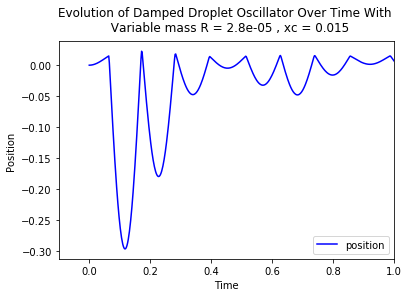

In [110]:
plt.plot(t, solution[:,0], c='b', label='position')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time')
plt.ylabel('Position ')
plt.title('Evolution of Damped Droplet Oscillator Over Time With \n  Variable mass R = {} , xc = {}' .format(R, x_c), pad = 10.)

plt.ticklabel_format(useOffset=False)
plt.legend(loc=4)
plt.xlim(-0.1,1)
plt.show()

In [111]:
print(times) 
print(len(times)) 
print() 
intervalz = np.empty([len(times)-1])
print(len(intervalz))

[ 0.     0.066  0.172  0.174  0.282  0.284  0.396  0.516  0.628  0.63
  0.74   0.742  0.858  0.99   1.108  1.248  1.368  1.512  1.634  1.786
  1.91   2.074  2.2    2.376  2.504  2.686  2.816  3.002  3.134  3.322
  3.456  3.648  3.784  3.786  3.916  3.918  4.056  4.246  4.386  4.578
  4.72   4.722  4.856  4.858  5.002  5.004  5.138  5.142  5.286  5.482
  5.626  5.83   5.974  5.976  6.114  6.116  6.26   6.698  6.842  7.288
  7.432  7.88   8.026  8.028  8.168  8.17   8.316  8.524  8.67   8.876
  9.022  9.024  9.162  9.164  9.31   9.312  9.45   9.452  9.598  9.6
  9.736  9.742  9.884 10.086 10.226 10.428 10.566 10.766 10.902 11.098
 11.232 11.418 11.55  11.722 11.852 11.854 11.98  11.982 12.108 12.246
 12.37  12.498 12.62  12.622 12.742 12.746 12.864 12.96  13.076 13.078
 13.194 13.196 13.308 13.38  13.49  13.552 13.66  13.712 13.818 13.858
 13.962 13.994 14.096 14.126 14.226 14.256 14.354 14.384 14.48  14.51
 14.604 14.634 14.726 14.756 14.846 14.876 14.964 14.994 15.08  15.11
 15.194 15.

In [112]:
a = np.array([1,2,3,4,5])
print(a) 

[1 2 3 4 5]


In [113]:
def Intervals(times): #defining interval finding function for time array 
    interval = np.empty([len(times) -1])
    for k in range(len(interval)): 
        interval[k] = times[k+1] - times[k]
    next_interval = interval[1:]
    interval = interval[0:len(times)-2]
    return interval, next_interval  
    

In [114]:
interval, next_inter = Intervals(times) 
print(interval) 
print(len(interval))
print() 
print(next_inter)
print(len(next_inter))

[0.066 0.106 0.002 0.108 0.002 0.112 0.12  0.112 0.002 0.11  0.002 0.116
 0.132 0.118 0.14  0.12  0.144 0.122 0.152 0.124 0.164 0.126 0.176 0.128
 0.182 0.13  0.186 0.132 0.188 0.134 0.192 0.136 0.002 0.13  0.002 0.138
 0.19  0.14  0.192 0.142 0.002 0.134 0.002 0.144 0.002 0.134 0.004 0.144
 0.196 0.144 0.204 0.144 0.002 0.138 0.002 0.144 0.438 0.144 0.446 0.144
 0.448 0.146 0.002 0.14  0.002 0.146 0.208 0.146 0.206 0.146 0.002 0.138
 0.002 0.146 0.002 0.138 0.002 0.146 0.002 0.136 0.006 0.142 0.202 0.14
 0.202 0.138 0.2   0.136 0.196 0.134 0.186 0.132 0.172 0.13  0.002 0.126
 0.002 0.126 0.138 0.124 0.128 0.122 0.002 0.12  0.004 0.118 0.096 0.116
 0.002 0.116 0.002 0.112 0.072 0.11  0.062 0.108 0.052 0.106 0.04  0.104
 0.032 0.102 0.03  0.1   0.03  0.098 0.03  0.096 0.03  0.094 0.03  0.092
 0.03  0.09  0.03  0.088 0.03  0.086 0.03  0.084 0.028 0.084 0.002 0.092
 0.002 0.082 0.002 0.09  0.002 0.078 0.026 0.074 0.028 0.072 0.03  0.068
 0.034 0.064 0.038 0.06  0.04  0.058 0.04  0.056 0.0

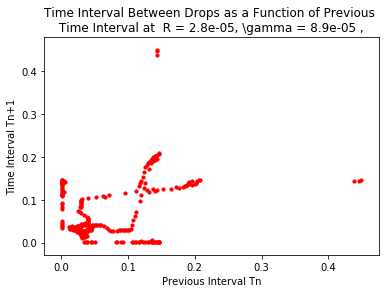

In [115]:
#plt.scatter(interval, next_inter, c='r', s = 10)
#plt.scatter(interval, next_inter, c='g', s = 10)
plt.scatter(interval, next_inter, c='r', s = 10)
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Previous Interval Tn')
plt.ylabel('Time Interval Tn+1')
plt.title('Time Interval Between Drops as a Function of Previous \n Time Interval at  R = {}, \gamma = {} , ' .format(R, damping_parameter))
plt.show()

(array([193.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  21.,  32.,   0.,   6.,  11.,
          9.,  10.,  27.,  13.,  10.,  23.]),
 array([0.002  , 0.00464, 0.00728, 0.00992, 0.01256, 0.0152 , 0.01784,
        0.02048, 0.02312, 0.02576, 0.0284 , 0.03104, 0.03368, 0.03632,
        0.03896, 0.0416 , 0.04424, 0.04688, 0.04952, 0.05216, 0.0548 ,
        0.05744, 0.06008, 0.06272, 0.06536, 0.068  , 0.07064, 0.07328,
        0.07592, 0.07856, 0.0812 , 0.08384, 0.08648, 0.08912, 0.09176,
        0.0944 , 0.09704, 0.09968, 0.10232, 0.10496, 0.1076 , 0.11024,
        0.11288, 0.11552, 0.11816, 0.1208 , 0.12344, 0.12608, 0.12872,
        0.13136, 0.134  ]),
 <a list of 50 Patch objects>)

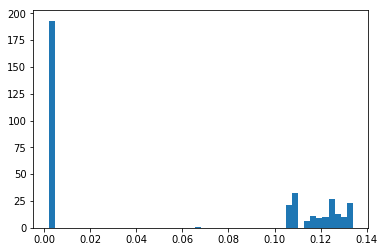

In [30]:
#histograms 

plt.hist(interval, bins = 50)


2.8e-05


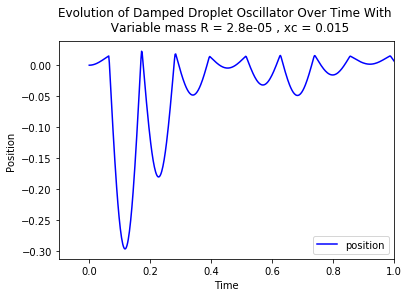

In [31]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.000089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
R = 0.000028
m_0 = 0.001 
delta_m= 0.001
x_c = 0.0150

N = 10000
t = np.linspace(0., 20., N+1) # [s] an array of time steps

solve_args  = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = damping_parameter +R
#not applying chain rule above
solve_args['R'] = R
solve_args['m_0']  = m_0
print(solve_args['R'])
initial_pos    = 0. # [m]
initial_vel = 0.001   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

solution, times = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)

plt.plot(t, solution[:,0], c='b', label='position')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time')
plt.ylabel('Position ')
plt.title('Evolution of Damped Droplet Oscillator Over Time With \n  Variable mass R = {} , xc = {}' .format(R, x_c), pad = 10.)

plt.ticklabel_format(useOffset=False)
plt.legend(loc=4)
plt.xlim(-0.1,1)
plt.show()

[0.066 0.106 0.002 0.108 0.002 0.112 0.12  0.112 0.002 0.11  0.002 0.116
 0.132 0.118 0.002 0.114 0.002 0.12  0.162 0.12  0.184 0.122 0.196 0.124
 0.206 0.126 0.002 0.126 0.002 0.128 0.002 0.128 0.002 0.13  0.002 0.13
 0.002 0.132 0.002 0.13  0.448 0.134 0.884 0.14  0.002 0.138 0.002 0.14
 0.672 0.144 0.002 0.14  0.002 0.144 0.446 0.144 0.22  0.144 0.222 0.144
 0.22  0.146 0.002 0.14  0.006 0.144 0.224 0.142 0.232 0.142 0.002 0.14
 0.232 0.142 0.002 0.138 0.002 0.142 0.002 0.138 0.002 0.14  0.214 0.138
 0.002 0.134 0.002 0.136 0.2   0.134 0.186 0.132 0.17  0.13  0.002 0.126
 0.002 0.126 0.136 0.124 0.128 0.12  0.104 0.118 0.096 0.116 0.082 0.112
 0.066 0.11  0.062 0.108 0.056 0.106 0.048 0.104 0.04  0.102 0.036 0.1
 0.034 0.098 0.032 0.096 0.032 0.094 0.032 0.092 0.03  0.09  0.03  0.088
 0.03  0.086 0.03  0.084 0.03  0.082 0.03  0.08  0.028 0.08  0.022 0.08
 0.018 0.08  0.002 0.086 0.002 0.078 0.002 0.084 0.002 0.076 0.002 0.082
 0.002 0.072 0.02  0.066 0.026 0.064 0.024 0.066 0.002 0.

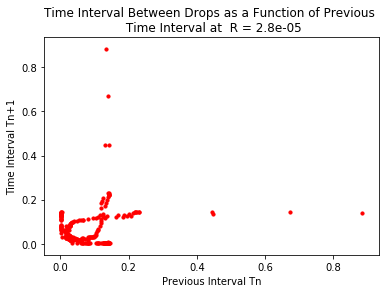

In [33]:
interval, next_inter = Intervals(times) 
print(interval) 
print(len(interval))
print() 
print(next_inter)
print(len(next_inter))

plt.scatter(interval, next_inter, c='r', s = 10)
#plt.scatter(interval, next_inter, c='g', s = 10)
#plt.scatter(interval, next_inter, c='r', s = 10)
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Previous Interval Tn')
plt.ylabel('Time Interval Tn+1')
plt.title('Time Interval Between Drops as a Function of Previous \n Time Interval at  R = {}' .format(R) , pad  = 6.0 )



plt.show()

(array([63., 81., 14., 19., 16., 11., 19., 33.,  7.,  2.,  3.,  2.,  5.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.002  , 0.01964, 0.03728, 0.05492, 0.07256, 0.0902 , 0.10784,
        0.12548, 0.14312, 0.16076, 0.1784 , 0.19604, 0.21368, 0.23132,
        0.24896, 0.2666 , 0.28424, 0.30188, 0.31952, 0.33716, 0.3548 ,
        0.37244, 0.39008, 0.40772, 0.42536, 0.443  , 0.46064, 0.47828,
        0.49592, 0.51356, 0.5312 , 0.54884, 0.56648, 0.58412, 0.60176,
        0.6194 , 0.63704, 0.65468, 0.67232, 0.68996, 0.7076 , 0.72524,
        0.74288, 0.76052, 0.77816, 0.7958 , 0.81344, 0.83108, 0.84872,
        0.86636, 0.884  ]),
 <a list of 50 Patch objects>)

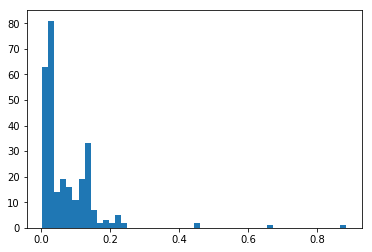

In [34]:
plt.hist(interval, bins = 50)

3e-05


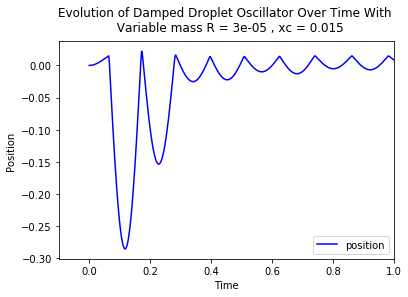

In [35]:
gravity_acc       = 10. # [m /s2]
mass    = 0.001 #  test mass in [kg]
damping_parameter = 0.000089 # viscosity of water @ room temperature [ kg /m^2]
spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
R = 0.00003
m_0 = 0.001 
delta_m= 0.001
x_c = 0.0150

N = 10000
t = np.linspace(0., 20., N+1) # [s] an array of time steps

solve_args  = {}
solve_args['k'] = spring_const
solve_args['m_0']  = m_0
solve_args['g'] = gravity_acc
solve_args['capital gamma'] = damping_parameter +R
#not applying chain rule above
solve_args['R'] = R
solve_args['m_0']  = m_0
print(solve_args['R'])
initial_pos    = 0. # [m]
initial_vel = 0.001   # [m /s]
initial_cond    = np.array([initial_pos, initial_vel])

solution, times = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)

plt.plot(t, solution[:,0], c='b', label='position')
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Time')
plt.ylabel('Position ')
plt.title('Evolution of Damped Droplet Oscillator Over Time With \n  Variable mass R = {} , xc = {}' .format(R, x_c), pad = 10.)

plt.ticklabel_format(useOffset=False)
plt.legend(loc=4)
plt.xlim(-0.1,1)
plt.show()

[0.066 0.106 0.002 0.108 0.002 0.114 0.112 0.116 0.116 0.122 0.12  0.126
 0.122 0.132 0.126 0.138 0.128 0.142 0.13  0.15  0.132 0.156 0.134 0.16
 0.136 0.166 0.138 0.17  0.14  0.174 0.142 0.176 0.144 0.176 0.146 0.178
 0.148 0.18  0.15  0.18  0.152 0.178 0.154 0.176 0.156 0.174 0.158 0.172
 0.16  0.17  0.162 0.168 0.162 0.168 0.16  0.168 0.16  0.166 0.16  0.164
 0.158 0.162 0.156 0.16  0.154 0.156 0.152 0.154 0.15  0.15  0.146 0.146
 0.142 0.142 0.138 0.138 0.134 0.132 0.128 0.126 0.124 0.122 0.118 0.114
 0.112 0.108 0.108 0.104 0.104 0.098 0.098 0.092 0.094 0.088 0.09  0.084
 0.086 0.08  0.082 0.078 0.08  0.074 0.076 0.07  0.074 0.068 0.07  0.066
 0.066 0.064 0.064 0.062 0.062 0.06  0.06  0.058 0.058 0.056 0.056 0.054
 0.054 0.054 0.05  0.054 0.048 0.052 0.048 0.05  0.048 0.048 0.048 0.046
 0.048 0.044 0.046 0.044 0.044 0.042 0.046 0.038 0.046 0.038 0.044 0.038
 0.042 0.038 0.042 0.036 0.042 0.034 0.044 0.03  0.046 0.026 0.048 0.024
 0.046 0.026 0.044 0.026 0.044 0.024 0.044 0.026 0.0

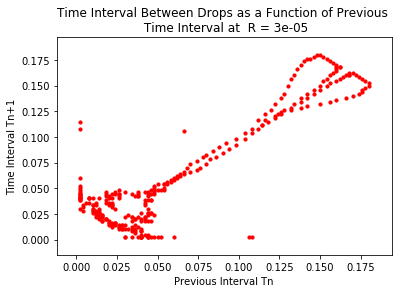

In [36]:
interval, next_inter = Intervals(times) 
print(interval) 
print(len(interval))
print() 
print(next_inter)
print(len(next_inter))

plt.scatter(interval, next_inter, c='r', s = 10)
#plt.scatter(interval, next_inter, c='g', s = 10)
#plt.scatter(interval, next_inter, c='r', s = 10)
#plt.plot(t, solved, 'r--', label='Small angle approx.')
plt.xlabel('Previous Interval Tn')
plt.ylabel('Time Interval Tn+1')
plt.title('Time Interval Between Drops as a Function of Previous \n Time Interval at  R = {}' .format(R) , pad  = 6.0 )
plt.show()

(array([22.,  5., 14., 14.,  8., 17., 16., 11., 10.,  7., 19., 22., 16.,
         3.,  6.,  4.,  5.,  5.,  1.,  2.,  3.,  3.,  1.,  2.,  2.,  2.,
         2.,  0.,  2.,  4.,  2.,  2.,  3.,  4.,  4.,  3.,  3.,  3.,  5.,
         5.,  3.,  5.,  5.,  6.,  9.,  1.,  5.,  3.,  5.,  4.]),
 array([0.002  , 0.00556, 0.00912, 0.01268, 0.01624, 0.0198 , 0.02336,
        0.02692, 0.03048, 0.03404, 0.0376 , 0.04116, 0.04472, 0.04828,
        0.05184, 0.0554 , 0.05896, 0.06252, 0.06608, 0.06964, 0.0732 ,
        0.07676, 0.08032, 0.08388, 0.08744, 0.091  , 0.09456, 0.09812,
        0.10168, 0.10524, 0.1088 , 0.11236, 0.11592, 0.11948, 0.12304,
        0.1266 , 0.13016, 0.13372, 0.13728, 0.14084, 0.1444 , 0.14796,
        0.15152, 0.15508, 0.15864, 0.1622 , 0.16576, 0.16932, 0.17288,
        0.17644, 0.18   ]),
 <a list of 50 Patch objects>)

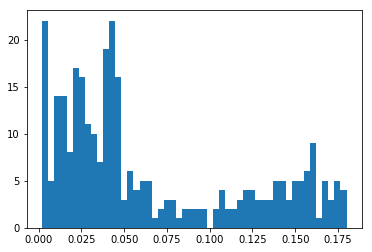

In [37]:
plt.hist(interval, bins = 50)

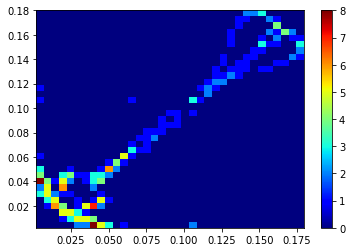

In [914]:
plt.hist2d(interval, next_inter, bins=(35, 35), cmap=plt.cm.jet)
plt.colorbar()

In [31]:
#run the above code for many values of R 

#graph tn on x vs r on y 

In [923]:
#How to calculate drip rates? 

def Drip_Rate(t,times): # linspace inputted and drop times 
    denom = t[-1] 
    num = len(times) 
    avg = num /denom 
    
    return avg #returns average drips per time inteval, since these values are mostly arbitrary we will consider this to be unitless and thus only helpful as a tool of comparison 


In [922]:
print(Drip_Rate(t,times))

15.5


In [47]:
from matplotlib.colors import LogNorm

def CreateAttractor(t,func, Rk4, lower_range, upper_range, Runs): 
    center = (upper_range  + lower_range) / 2 
    #center = round(center, -2)
    fig, axs = plt.subplots(1,3, sharey = False ,figsize=(12, 5)) #Set up axes
    axs[0].set_xlabel('Previous Time Interval Tn')
    axs[0].set_ylabel('Time Interval Tn+1')
    axs[1].set_ylabel('Time Interval Tn+1')
    axs[1].set_xlabel('Previous Time Interval Tn')
    axs[0].set_title('Time Interval Between Drops as a Function \n of Previous Time Interval for \n Mass flows around R = {}' .format(center) , pad  = 6.0)
    axs[1].set_title(' 2-D Histogram of Interval Plot')
    axs[2].set_title('Histogram')
    axs[2].set_ylabel('Frequency')
    axs[2].set_xlabel('Time Interval Tn')
    gravity_acc       = 10. # [m /s2]
    mass    = 0.001 #  test mass in [kg]
    damping_parameter = 0.000089 # viscosity of water @ room temperature [ kg /m^2]
    spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
    


    m_0               = 0.001 
    delta_m           = 0.001
    x_c               = 0.0150
    initial_pos       = 0. # [m]
    initial_vel       = 0.001   # [m /s]
    N = 10000
    t = np.linspace(0., 20., N+1)
    initial_cond      = np.array([initial_pos, initial_vel])
    
    Rset              = np.linspace(lower_range ,upper_range, Runs)
    
    x = np.empty([1,1]) 
    y = np.empty([1,1])
    for Rs in range(len(Rset)): 
        R = Rset[Rs]
        print(R) 
        
        
        solve_args  = {}
        solve_args['k'] = spring_const
        solve_args['m_0']  = m_0
        solve_args['g'] = gravity_acc
        solve_args['capital gamma'] = R + damping_parameter 
        solve_args['R'] = R
        #print(solve_args['R'])
        solve_args['m_0']  = m_0
        
        solution, times = Rk4(func, initial_cond, t, x_c, delta_m, solve_args)
        
        

        interval, next_inter = Intervals(times) 
        print(range(len(interval)))
        for i in range(len(interval)): 
            x = np.append(x,interval[i])
        #print(interval)
        
        for j in range(len(next_inter)): 
            y = np.append(y,next_inter[j])
      
    
    #np.delete(x, x[0])
    #np.delete(y,y[0]) 
    x = x[1:]
    y = y[1:]
    
    print(len(x))
    #print(x)
    print(len(y))
    axs[0].scatter(x,y, c='g', s = 10)
    counts, xedges, yedges, im = axs[1].hist2d(x,y, bins = (50,50) , cmap=plt.cm.jet)
    plt.colorbar(im,ax =axs[1])
    axs[2].hist(x, bins = 50) 
    print('Range of Mass Flows: {} , {}' .format(lower_range, upper_range))

    #axs[0].set_xlim(0,0.8)
    #axs[0].set_ylim(0,0.8)
        
        
solution, times = RungeKutta4_Drop(VariableMass_Oscillator_Drop, initial_cond, t, x_c, delta_m, solve_args)



2.98e-05
range(0, 306)
3.01e-05
range(0, 310)
3.04e-05
range(0, 318)
3.07e-05
range(0, 336)
3.1e-05
range(0, 359)
1629
1629
Range of Mass Flows: 2.98e-05 , 3.1e-05
None


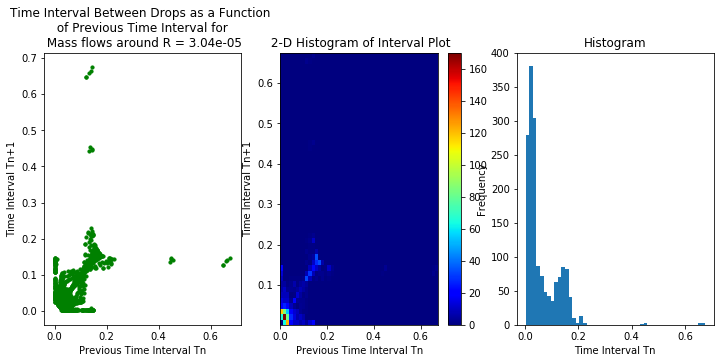

In [51]:
print(CreateAttractor(t,VariableMass_Oscillator_Drop, RungeKutta4_Drop,0.0000298,0.000031,5))

In [1084]:
#getting opposite effect? 

In [1098]:
def Bifurcation(t,func, Rk4, lower_range, upper_range, Runs ):
    center = (upper_range  + lower_range) / 2 
    #center = round(center, -2)
    fig, axs = plt.subplots(figsize=(12, 5)) #Set up axes
    axs.set_xlabel('Mass Flow Rate')
    axs.set_ylabel('Time Interval Tn')
    axs.set_title('Bifurcation of Attractors' , pad  = 6.0)
    gravity_acc       = 10. # [m /s2]
    mass    = 0.001 #  test mass in [kg]
    damping_parameter = 0.000089 # viscosity of water @ room temperature [ kg /m^2]
    spring_const = .9 # arbitrary spring const. not sure what this would be in reality 
    


    m_0               = 0.001 
    delta_m           = 0.001
    x_c               = 0.0150
    initial_pos       = 0. # [m]
    initial_vel       = 0.001   # [m /s]
    N = 10000
    t = np.linspace(0., 20., N+1)
    initial_cond      = np.array([initial_pos, initial_vel])
    
    Rset              = np.linspace(lower_range ,upper_range, Runs)
    
    x = np.empty([1,1]) 
    y = np.empty([1,1])
    for Rs in range(len(Rset)): 
        R = Rset[Rs]
        print(R) 
        
        
        solve_args  = {}
        solve_args['k'] = spring_const
        solve_args['m_0']  = m_0
        solve_args['g'] = gravity_acc
        solve_args['capital gamma'] = R + damping_parameter 
        solve_args['R'] = R
        #print(solve_args['R'])
        solve_args['m_0']  = m_0
        
        solution, times = Rk4(func, initial_cond, t, x_c, delta_m, solve_args)
        
        

        interval, next_inter = Intervals(times) 
        print(range(len(interval)))
        for i in range(len(interval)): 
            y = np.append(y,interval[i])
        #print(interval)
        
        for j in range(len(interval)): 
            x = np.append(x,R)
      
    
    #np.delete(x, x[0])
    #np.delete(y,y[0]) 
    x = x[1:]
    y = y[1:]
    
    print(len(x))
    #print(x)
    print(len(y))
    axs.scatter(x,y, c='g', s = 10)
    
    
    axs.set_xlim(0,0.008)
    #axs[0].set_ylim(0,0.8)
        
        

In [40]:
Bifurcation(t,VariableMass_Oscillator_Drop, RungeKutta4_Drop, 0.000002,0.0000302, 10 )

NameError: name 'Bifurcation' is not defined